In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
mp_key = "rp4DtuzKYSzwLoY22WqkCtwvk1sjt8F3"
mp_id = "mp-15781"

# Télécharger la structure
with MPRester(mp_key) as mpr:
    structure = mpr.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

3  first X diffraction peaks :
Peak 0 : Angle 2θ = 12.11°, Intensity = 54.27, hkl indices = (1, 1, 1)
Peak 1 : Angle 2θ = 24.27°, Intensity = 20.91, hkl indices = (1, 0, 0)
Peak 2 : Angle 2θ = 24.36°, Intensity = 12.13, hkl indices = (2, 2, 2)


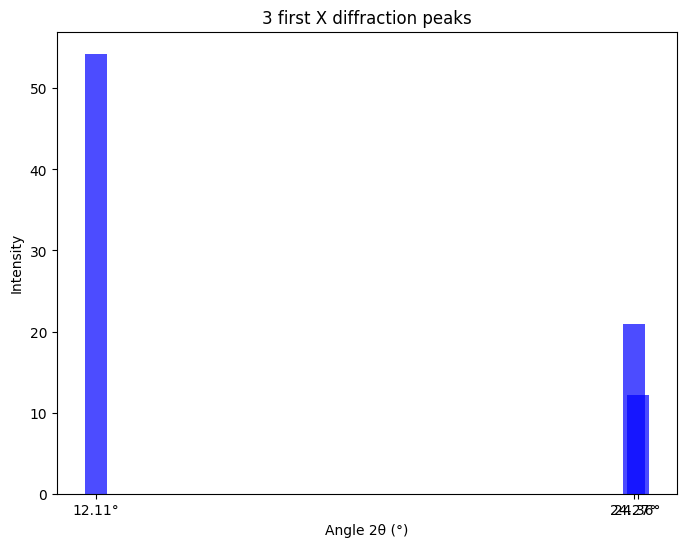

3 largest X diffraction peaks:
Peak 0 : Angle 2θ = 29.01°, Intensity = 100.00, hkl indices = (2, 1, 1)
Peak 1 : Angle 2θ = 12.11°, Intensity = 54.27, hkl indices = (1, 1, 1)
Peak 2 : Angle 2θ = 40.91°, Intensity = 34.31, hkl indices = (3, 3, 2)


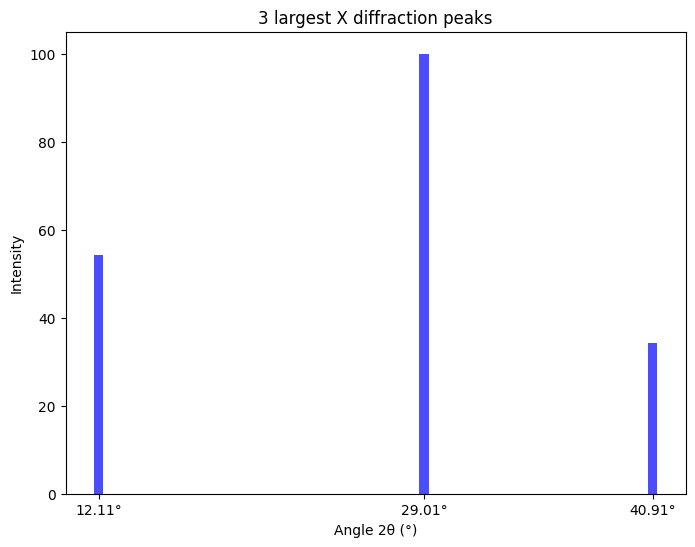

In [14]:
# Calcul du diffractogramme avec le rayonnement Cu Kα (λ = 1.54060 Å)
xrd_calculator = XRDCalculator(wavelength=1.54060)
diffraction_pattern = xrd_calculator.get_pattern(structure)

# Extraire les 3 premiers pics (triés par intensité décroissante)
peaks = zip(diffraction_pattern.x[:3], diffraction_pattern.y[:3], diffraction_pattern.hkls[:3])
print("3  first X diffraction peaks :")
angles = []
intensities = []
for i, (angle, intensity, hkls) in enumerate(peaks, start=0):
    hkl_indices = hkls[0]['hkl'] if hkls else "N/A"
    print(f"Peak {i} : Angle 2θ = {angle:.2f}°, Intensity = {intensity:.2f}, hkl indices = {hkl_indices}")
    angles.append(angle)
    intensities.append(intensity)


# Créer un graphe des 3 premiers pics
plt.figure(figsize=(8, 6))
plt.bar(angles, intensities, width=0.5, color='blue', alpha=0.7)
plt.xlabel('Angle 2θ (°)')
plt.ylabel('Intensity')
plt.title('3 first X diffraction peaks')
plt.xticks(angles, [f'{angle:.2f}°' for angle in angles])
plt.show()

peaks = sorted(zip(diffraction_pattern.x, diffraction_pattern.y, diffraction_pattern.hkls),
               key=lambda x: x[1], reverse=True)[:3]

print("3 largest X diffraction peaks:")
angles = []
intensities = []
for i, (angle, intensity, hkls) in enumerate(peaks, start=0):
    hkl_indices = hkls[0]['hkl'] if hkls else "N/A"
    print(f"Peak {i} : Angle 2θ = {angle:.2f}°, Intensity = {intensity:.2f}, hkl indices = {hkl_indices}")
    angles.append(angle)
    intensities.append(intensity)
# Créer un graphe des 3 plus grands pics
plt.figure(figsize=(8, 6))
plt.bar(angles, intensities, width=0.5, color='blue', alpha=0.7)
plt.xlabel('Angle 2θ (°)')
plt.ylabel('Intensity')
plt.title('3 largest X diffraction peaks')
plt.xticks(angles, [f'{angle:.2f}°' for angle in angles])
plt.show()
